In [1]:
import numpy as np

In [5]:
class Lasso:

    def __init__(self, learning_rate = 0.01, epoch = 1000, tol = 1e-4, batch_size = 64, seed = 42, l1_regularization= 0, verbose = False) -> None:

        self.verbose = verbose
        self.lr = learning_rate
        self.tol = tol
        self.epoch = epoch
        self.batch_size = batch_size
        self.l1 = l1_regularization
        self.loss = np.zeros(shape = (self.epoch, ))


    def predict(self, X):

        m, _ = X.shape
        X = np.hstack((np.ones((m, 1)), X))

        return np.dot(X, self.coefs_)
    

    def batch_generator(self, X, y, batch_size):

        m, _ = X.shape
        indices = np.arange(m)
        np.random.shuffle(indices)

        for start in np.arange(0, m, batch_size):

            end = min(start + batch_size, m)
            yield X[start : end], y[start : end]
    

    def fit(self, X, y):

        m, n = X.shape
        x = X.copy()
        X = np.hstack((np.ones((m, 1)), X))

        if y.ndim == 1:

            self.coefs_ = np.random.uniform(-0.5, 0.5, size = (n + 1, ))
        
        else:

            self.coefs_ = np.random.uniform(-0.5, 0.5, size = (n + 1, 1))
        

        for e in np.arange(self.epoch):

            pred = self.predict(x)
            loss = np.mean(np.square(y - pred)) + self.l1 * np.sum(np.abs(self.coefs_[1:]))
            self.loss[e] = loss

            self.coefs_ -= self.lr * (-2 / m) * np.dot(X.T, y - pred)  + self.l1 * np.sign(np.hstack(([0], self.coefs_[1:])))
                            

            if self.verbose:
                print(f"epoch {e}/{self.epoch} -- loss {self.loss[e]:.2f}")

            if e >= 1 and np.abs(self.loss[e] - self.loss[e - 1]) < self.tol:

                break

epoch 0/1000 -- loss 46.04
epoch 1/1000 -- loss 42.41
epoch 2/1000 -- loss 39.07
epoch 3/1000 -- loss 36.00
epoch 4/1000 -- loss 33.18
epoch 5/1000 -- loss 30.59
epoch 6/1000 -- loss 28.21
epoch 7/1000 -- loss 26.02
epoch 8/1000 -- loss 24.00
epoch 9/1000 -- loss 22.15
epoch 10/1000 -- loss 20.45
epoch 11/1000 -- loss 18.88
epoch 12/1000 -- loss 17.44
epoch 13/1000 -- loss 16.12
epoch 14/1000 -- loss 14.90
epoch 15/1000 -- loss 13.78
epoch 16/1000 -- loss 12.75
epoch 17/1000 -- loss 11.81
epoch 18/1000 -- loss 10.94
epoch 19/1000 -- loss 10.14
epoch 20/1000 -- loss 9.40
epoch 21/1000 -- loss 8.73
epoch 22/1000 -- loss 8.10
epoch 23/1000 -- loss 7.53
epoch 24/1000 -- loss 7.01
epoch 25/1000 -- loss 6.52
epoch 26/1000 -- loss 6.08
epoch 27/1000 -- loss 5.67
epoch 28/1000 -- loss 5.29
epoch 29/1000 -- loss 4.95
epoch 30/1000 -- loss 4.63
epoch 31/1000 -- loss 4.33
epoch 32/1000 -- loss 4.06
epoch 33/1000 -- loss 3.82
epoch 34/1000 -- loss 3.59
epoch 35/1000 -- loss 3.38
epoch 36/1000 -- l

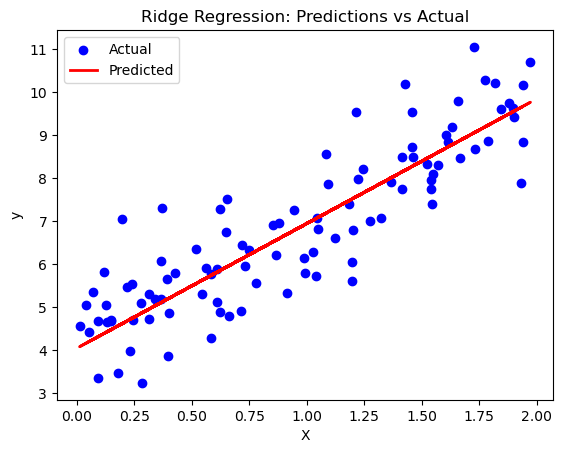

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset for testing
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)

# Instantiate the Ridge regression class
Lasso_model = Lasso(learning_rate = 0.01, epoch = 1000, l1_regularization = 0.001, verbose = True)

# Fit the model on the entire dataset
Lasso_model.fit(X, y)

# Predict on the same dataset (using the same X for prediction)
y_pred = Lasso_model.predict(X)  # Adding bias term

# Print out the final training loss
print(f"Final training loss: {Lasso_model.loss[-1]:.4f}")

# Plot predictions vs actual
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression: Predictions vs Actual")
plt.legend()
plt.show()